## 한글 글꼴

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,906 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

## 모델 학습 및 시각화

Accuracy: 0.574468085106383
Confusion Matrix:
[[73 22]
 [38  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        95
           1       0.27      0.17      0.21        46

    accuracy                           0.57       141
   macro avg       0.46      0.47      0.46       141
weighted avg       0.53      0.57      0.55       141



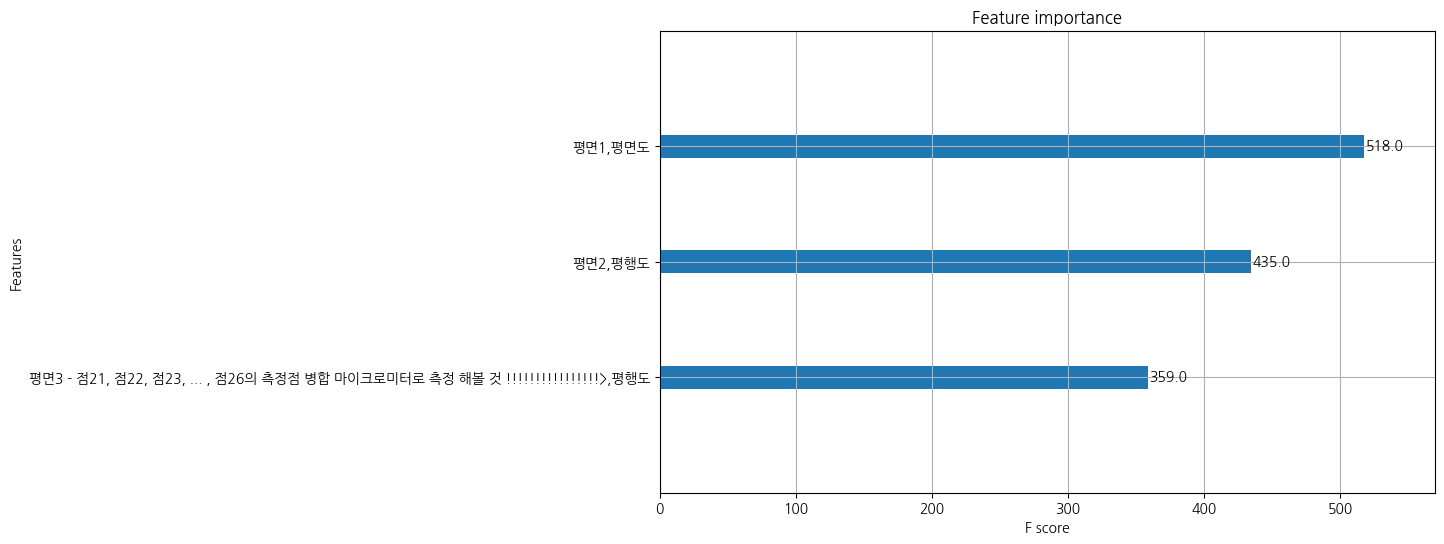

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc
import xgboost as xgb
import numpy as np

# Step 1: Read the CSV file
file_path = '/content/cmm_data_.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='cp949')

# Dropping the "파일명" column as it is not needed for training
data.drop("파일명", axis=1, inplace=True)

# Convert all non-numeric columns to numeric using one-hot encoding
data = pd.get_dummies(data)

# Ensure column names are strings without problematic characters
data.columns = [str(col).replace('[','').replace(']','').replace('<','') for col in data.columns]

# Defining the features (X) and the target (y)
X = data.drop("품질상태", axis=1)
y = data["품질상태"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Step 3: Making predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Step 4: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

# Step 5: Visualizing Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_clf, ax=plt.gca())
plt.show()

## 시각화 보완

Accuracy: 0.574468085106383
Confusion Matrix:
[[73 22]
 [38  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        95
           1       0.27      0.17      0.21        46

    accuracy                           0.57       141
   macro avg       0.46      0.47      0.46       141
weighted avg       0.53      0.57      0.55       141



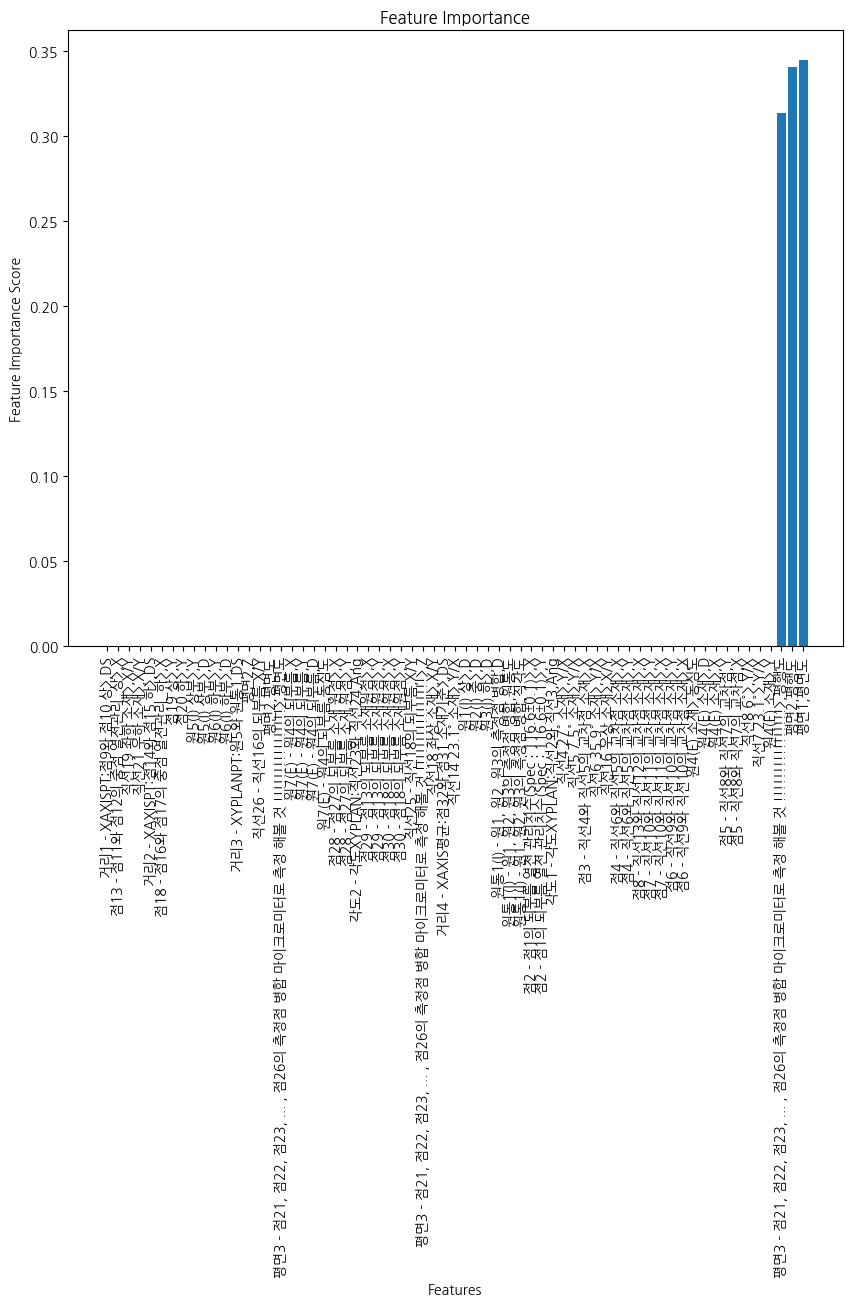

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import xgboost as xgb
import numpy as np

# Step 1: Read the CSV file
file_path = '/content/cmm_data_.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='cp949')

# Dropping the "파일명" column as it is not needed for training
data.drop("파일명", axis=1, inplace=True)

# Convert all non-numeric columns to numeric using one-hot encoding
data = pd.get_dummies(data)

# Ensure column names are strings without problematic characters
data.columns = [str(col).replace('[','').replace(']','').replace('<','') for col in data.columns]

# Defining the features (X) and the target (y)
X = data.drop("품질상태", axis=1)
y = data["품질상태"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Step 3: Making predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Step 4: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Set Korean font
plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

# Step 5: Visualizing Feature Importance
plt.figure(figsize=(10, 8))
importance = xgb_clf.feature_importances_
features = X.columns

# Sorting features by importance
indices = np.argsort(importance)

# Plotting
plt.bar(range(len(indices)), importance[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Feature Importance')
plt.show()

Accuracy: 0.574468085106383
Confusion Matrix:
[[73 22]
 [38  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        95
           1       0.27      0.17      0.21        46

    accuracy                           0.57       141
   macro avg       0.46      0.47      0.46       141
weighted avg       0.53      0.57      0.55       141



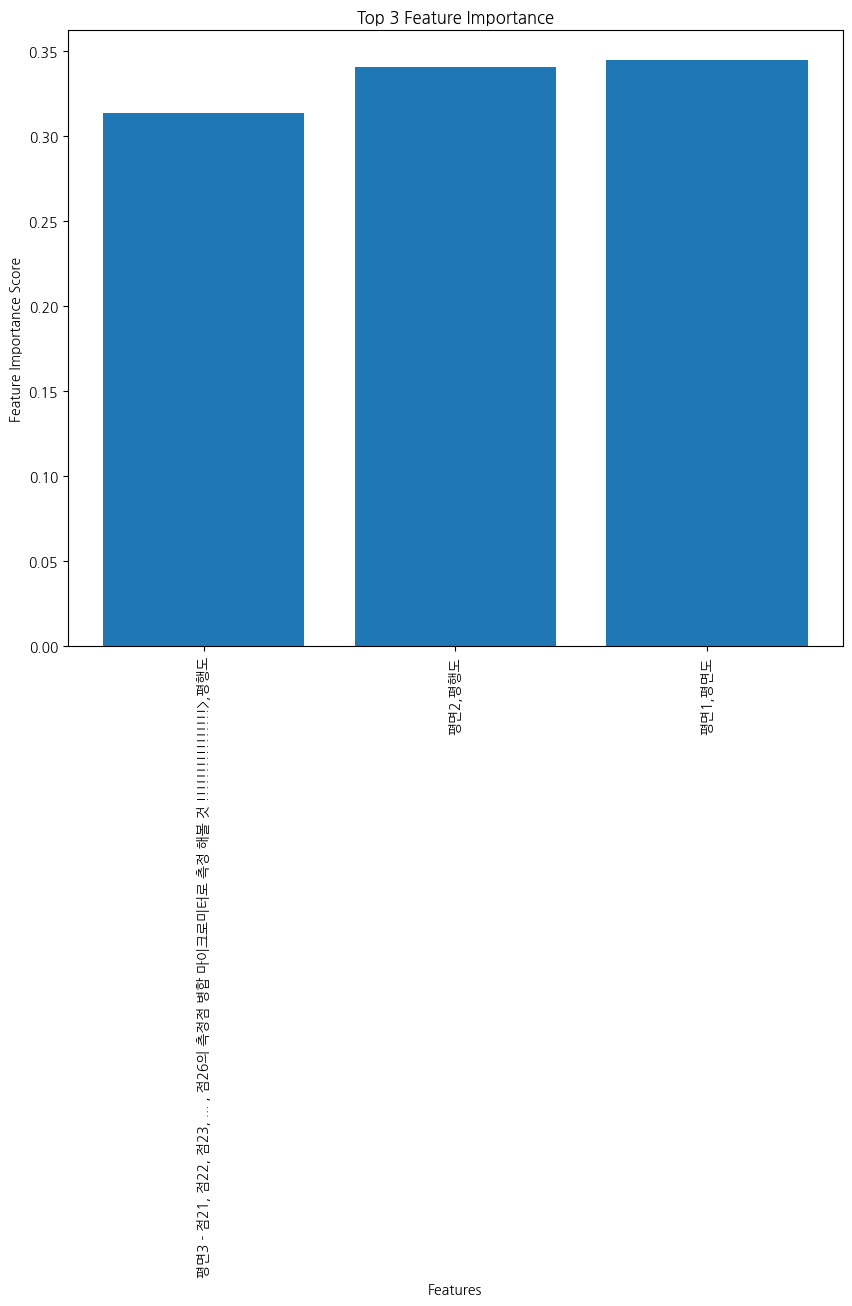

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import xgboost as xgb
import numpy as np

# Step 1: Read the CSV file
file_path = '/content/cmm_data_.csv'  # Update the path if necessary
data = pd.read_csv(file_path, encoding='cp949')

# Dropping the "파일명" column as it is not needed for training
data.drop("파일명", axis=1, inplace=True)

# Convert all non-numeric columns to numeric using one-hot encoding
data = pd.get_dummies(data)

# Ensure column names are strings without problematic characters
data.columns = [str(col).replace('[','').replace(']','').replace('<','') for col in data.columns]

# Defining the features (X) and the target (y)
X = data.drop("품질상태", axis=1)
y = data["품질상태"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Step 3: Making predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Step 4: Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Set Korean font
plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

# Step 5: Visualizing Feature Importance
plt.figure(figsize=(10, 8))
importance = xgb_clf.feature_importances_
features = X.columns

# Get indices of top 3 features
top_indices = np.argsort(importance)[-3:]

# Plotting
plt.bar(range(len(top_indices)), importance[top_indices], align='center')
plt.xticks(range(len(top_indices)), [features[i] for i in top_indices], rotation=90)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Top 3 Feature Importance')
plt.show()


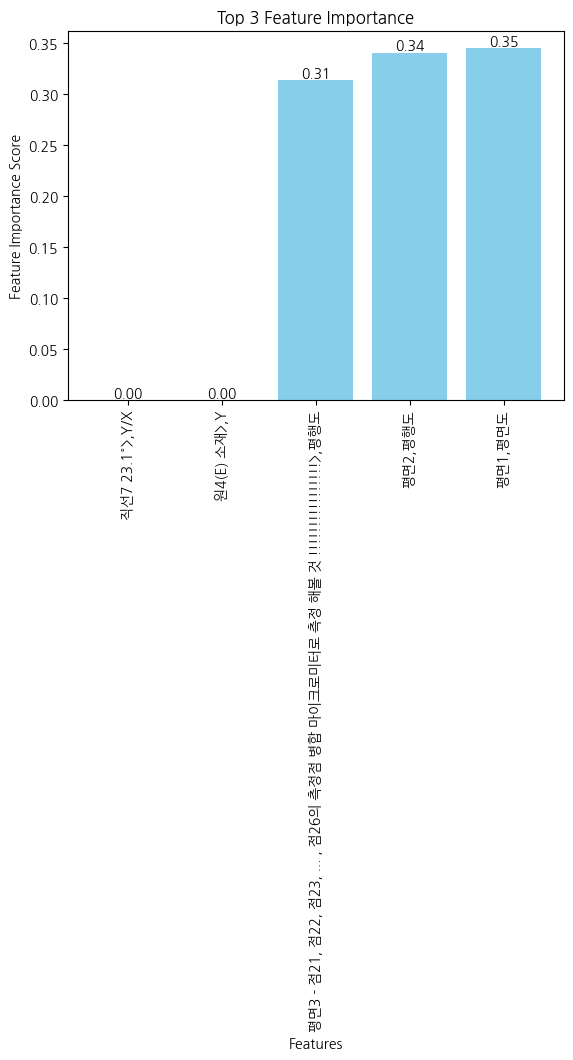

In [ ]:
top_indices = np.argsort(importance)[-5:]
plt.bar(range(len(top_indices)), importance[top_indices], align='center', color='skyblue')
plt.xticks(range(len(top_indices)), [features[i] for i in top_indices], rotation=90)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Top 3 Feature Importance')

# Adding value labels on top of the bars
for i in range(len(top_indices)):
    plt.text(i, importance[top_indices][i], f'{importance[top_indices][i]:.2f}', ha='center', va='bottom')

plt.show()